In [29]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
data = pd.read_csv(open('C:/Users/Roman/Documents/CMF/Moscow_flats.csv'), delimiter=',', quotechar='"')

In [31]:
data.head()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
0,3.0,123000000.0,182.0,98.8,32.1,4.616580,2.0,1.0,1.0,0.0,1.0,4.0,7.0,0.0
1,5.0,109781750.0,460.0,0.0,0.0,3.304410,9.0,1.0,0.0,0.0,0.0,5.0,8.0,0.0
2,2.0,12700000.0,51.0,34.0,9.0,6.627970,2.0,1.0,0.0,1.0,1.0,11.0,16.0,0.0
3,1.0,4585315.0,17.3,17.3,0.0,6.293283,6.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
4,1.0,4814581.0,17.3,10.0,0.0,6.293283,6.0,1.0,1.0,0.0,0.0,2.0,5.0,1.0


In [32]:
data.describe()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
count,9744.000000,9.744000e+03,9744.000000,9744.00000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000
mean,1.883005,1.955238e+07,57.399261,32.85000,7.087438,5.389690,7.070197,0.931034,0.597291,0.397783,0.513547,5.065271,9.759852,0.235222
std,0.869537,3.153815e+07,37.179321,23.66459,6.242234,1.978814,3.351335,0.253408,0.490468,0.489465,0.499842,4.357645,7.370282,0.424159
min,0.000000,4.585315e+06,17.300000,0.00000,0.000000,0.973796,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.050000e+07,39.200000,20.00000,0.000000,3.747522,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000
50%,2.000000,1.355000e+07,50.000000,30.00000,7.000000,5.641059,6.000000,1.000000,1.000000,0.000000,1.000000,4.000000,9.000000,0.000000
75%,2.000000,1.678100e+07,60.825000,41.12500,10.000000,6.441470,10.000000,1.000000,1.000000,1.000000,1.000000,6.000000,12.000000,0.000000
max,5.000000,5.326952e+08,460.000000,170.00000,60.700000,24.241565,20.000000,1.000000,1.000000,1.000000,1.000000,54.000000,86.000000,1.000000


Большой разброс цен, есть смысл работать с логарифмом от цены. Некоторые бинарные признаки (Walk, New) имеют сильно смещенное распределение. Возможно стоит рассматривать как категориальные остальные бинарные признаки. 

Построим корреляционную карту.

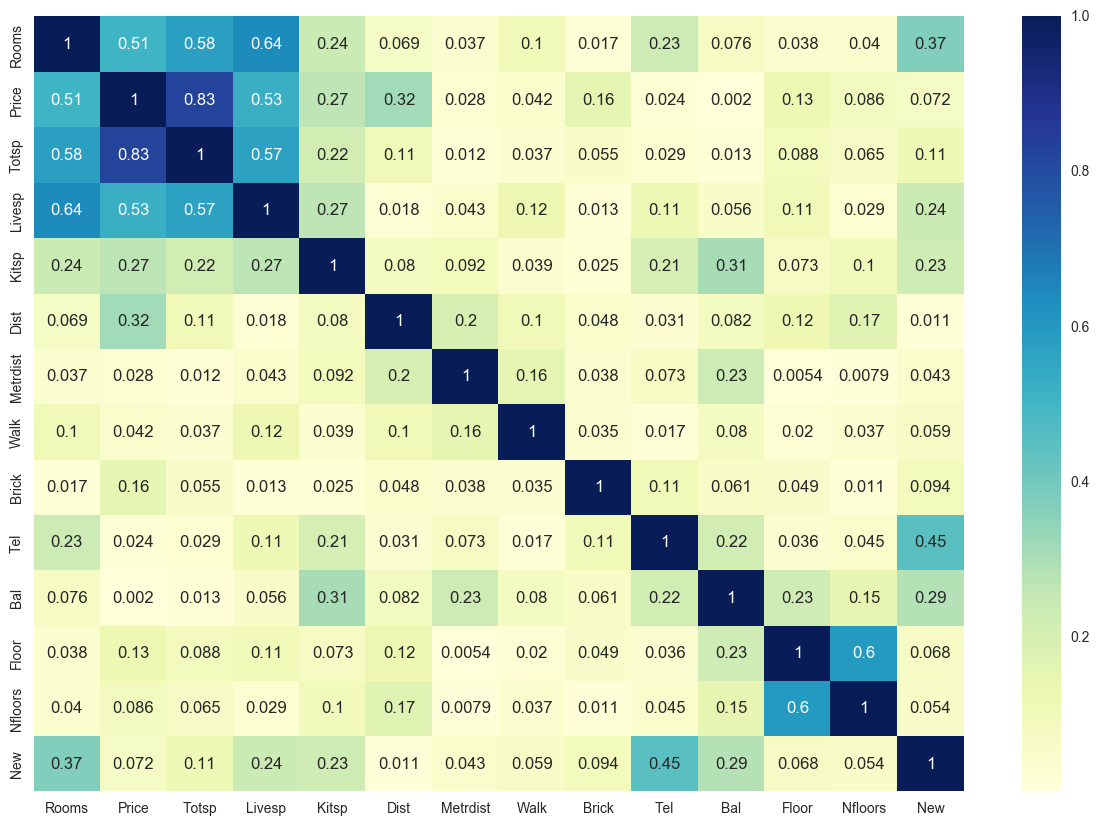

In [33]:
data['Price']=np.log10(data['Price'])
corr = abs(data.corr())
fig, ax = plt.subplots(figsize=(15,10)) 
sb.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values, annot=True, cmap='YlGnBu')

sb.plt.show()

Было предположение, что цена имеет корреляцию с общей и жилой площадью и количеством комнат.
Но только при замене price на log(price) корреляция цены с жилой площадью и количеством комнат стала больше 0.5. Так же, что логично, номер этажа коррелирует с этажностью дома. 

Построим графики log(Price) от коррелируемых признаков.

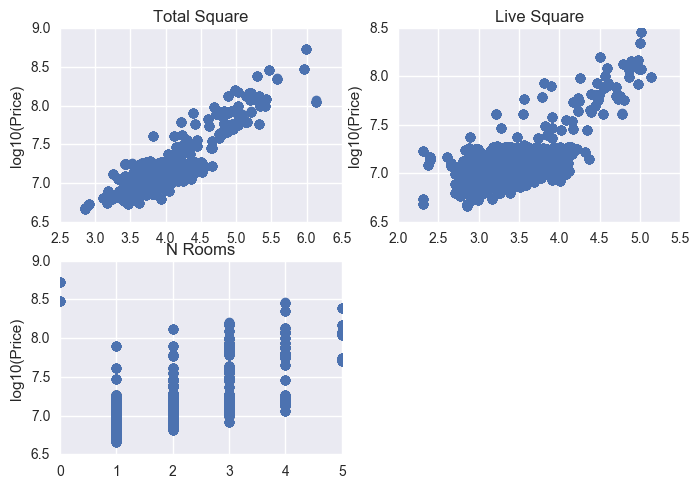

In [34]:
plt.figure(1)
plt.subplot(221)
plt.plot(np.log(data['Totsp']),data['Price'],'o')
plt.ylabel('log10(Price)')
plt.title('Total Square')
plt.subplot(222)
plt.plot(np.log(data['Livesp']),data['Price'],'o')
plt.ylabel('log10(Price)')
plt.title('Live Square')
plt.subplot(223)
plt.plot((data['Rooms']),data['Price'],'o')
plt.ylabel('log10(Price)')
plt.title('N Rooms')
plt.show()


На графике "N Rooms - log10(price)" самые дорогие квартиры соответствуют числу комнат = 0. Можно присвоить этим квартирам число комнат = 6

In [35]:
data['Rooms'][data['Rooms']==0]=6

Теперь построим гистограммы распределения жилой/общей площади.

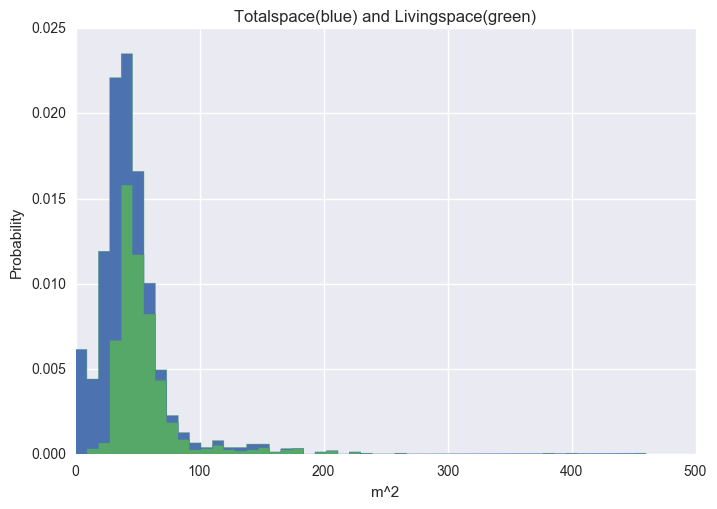

In [36]:
num_bins = 50
x = [data.Totsp, data.Livesp] 
n, bins, patches = plt.hist(x, num_bins,histtype='step', normed=1,stacked=True, fill=True)
plt.xlabel('m^2')
plt.ylabel('Probability')
plt.title(r'Totalspace(blue) and Livingspace(green)')
plt.show()


Существует достаточно много квартир с нулевой жилой площадью, а так же с жилой площадью, совпадающей с общей. Это видно из следующего графика.

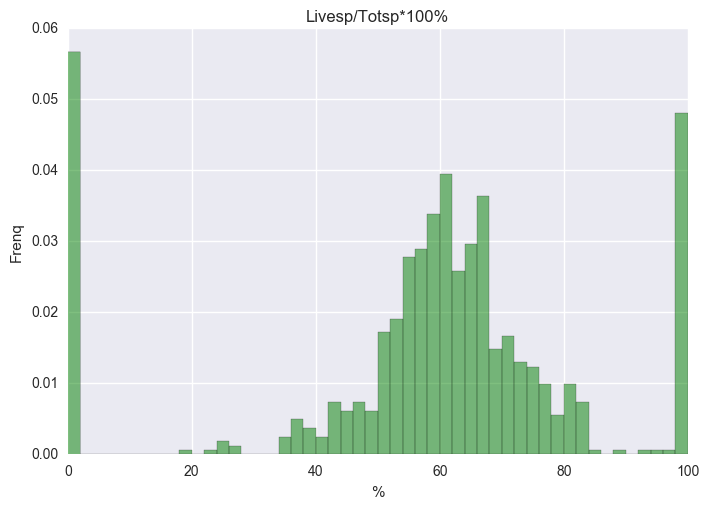

In [37]:
num_bins = 50
n, bins, patches = plt.hist(data['Livesp']/data['Totsp']*100, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('%')
plt.ylabel('Frenq')
plt.title(r'Livesp/Totsp*100%')
plt.show()

Среднее значение Livesp/Totsp равно 0.6. Так что заменим неправдопадобные значения (которых ~10%) на 0.6*Totsp

In [38]:
for i in range(len(data)):
    if data.Livesp[i] == 0:
        data.Livesp[i] = data.Totsp[i]*0.6

for i in range(len(data)):
    if data.Livesp[i] == data.Totsp[i]:
        data.Livesp[i] = data.Totsp[i]*0.6

Предыдущие действия сделали Totsp и Livesp практически полностью скоррелированными. Хотя и до этого они были на 0.57. Так что лучше оставить как есть.

Есть ряд квартир, для которых NFloors = 0. Если посомтреть на график цена-число этажей, то нулевые значения не отличаются от остальных. Можно заменить их на 10. Поскольку корреляции с ценой все равно нет.

In [39]:
for i in range(len(data)):
    if data.Nfloors[i] == 0:
        data.Nfloors[i] = 10

Признаки: телефон, балкон, новостройка не коррелируют с ценой. Создать интегральные признаки из них не получилось. Единственный искуственный признак, что можно отметить выглядит так:

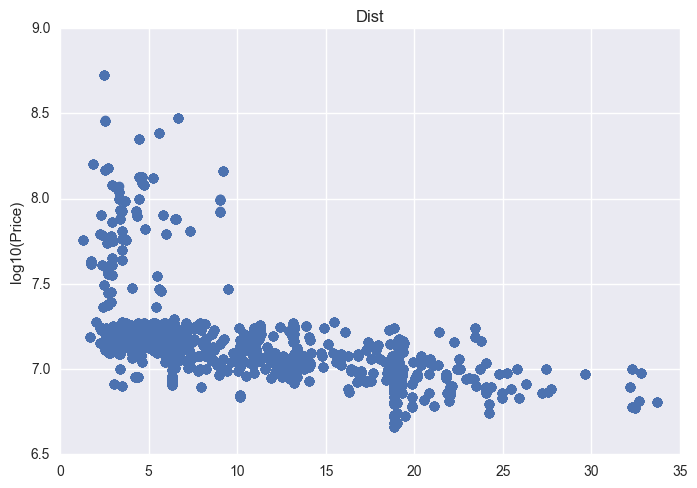

In [40]:
plt.plot(data.Dist*(1+2*(data.Totsp<50)),data['Price'],'o')
plt.ylabel('log10(Price)')
plt.title('Dist')
plt.show()

То есть, для небольших по площади квартир(меньше 50) справедлива отрицательная скоррелированность цены и расстояния от центра. Звучит вполне правдоподобно. Таких квартир больше половины, так что можно использовать. Для комнат с большей площадью такой зависимости нет.
Посмотрим на корреляция нового признака:


In [41]:
np.corrcoef(data.Dist*(1+2*(data.Totsp<50)),data.Price)

array([[ 1.        , -0.54892563],
       [-0.54892563,  1.        ]])

Таким образом, если раньше корреляция для признака Dist была 0.3, то тепеь стала -0.56. 